In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

# Clustering

## 1. K-means clustering with no-supervised data

In [4]:
data = pd.read_csv('datasets/Mall_Customers.csv', index_col=0)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
## To work in 2D 
data.drop('Gender', axis=1, inplace=True)
data.drop('Age', axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [6]:
## To shuffle data
data = data.sample(frac=1)

In [7]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [8]:
k_means.labels_

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1])

In [9]:
np.unique(k_means.labels_) #To see cluster, 2 here

array([0, 1])

In [10]:
centers = k_means.cluster_centers_
centers

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

## 1. To plot cluster

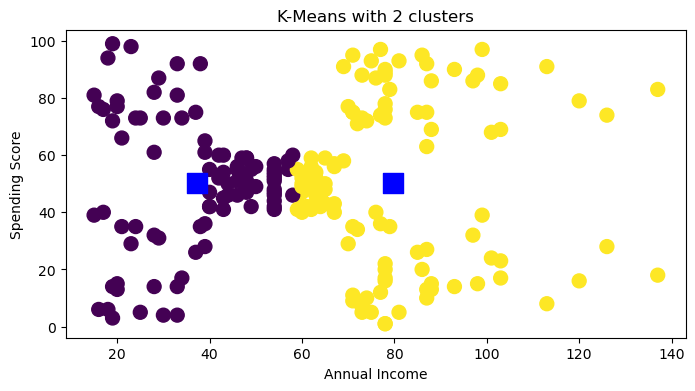

In [12]:
plt.figure(figsize=(8, 4))

plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color=['blue'], marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

## 1. Evaluate model

In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, k_means.labels_)

print("Score = ", score) # really bad here.

Score =  0.29689691625030085


In [15]:
# To improve score with more cluster

k_means = KMeans(n_clusters=5)
k_means.fit(data)

C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [17]:
np.unique(k_means.labels_) # 5 here

array([0, 1, 2, 3, 4])

In [18]:
centers = k_means.cluster_centers_

centers

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

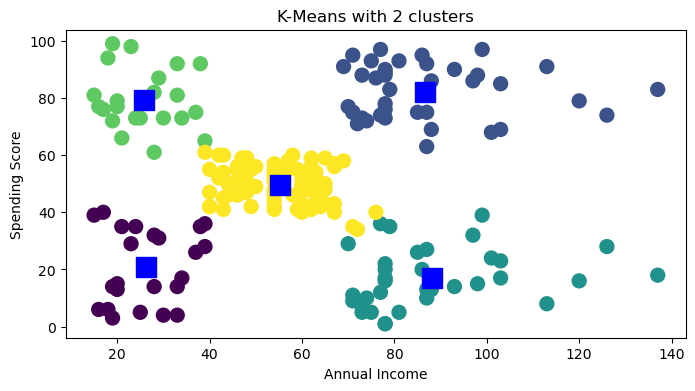

In [19]:
plt.figure(figsize=(8, 4))

plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color=['blue'], marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [20]:
score = silhouette_score(data, k_means.labels_)

print("Score = ", score) # better here

Score =  0.553931997444648


## K-means clustering with labelled data

In [21]:
data = pd.read_csv('datasets/cars.csv')

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [22]:
data = data.sample(frac=1) # To shuffle data

## 2. Exploring and cleaning data

In [23]:
# We need only numeric value for clustering
data.info()
# Here two objetcs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 119 to 105
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [25]:
data.columns = data.columns.str.lstrip() # Remove space in columns

In [27]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

In [28]:
data.dropna(inplace=True)

In [30]:
## Encode categ variable to int
from sklearn.preprocessing import LabelEncoder 

labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
119,15.0,8,429.0,198,4341.0,10,1971,2
50,13.0,8,400.0,150,4464.0,12,1974,2
86,18.0,6,199.0,97,2774.0,16,1971,2
90,34.1,4,86.0,65,1975.0,15,1980,1
230,15.0,8,383.0,170,3563.0,10,1971,2


In [31]:
# To select specific rows
data_x = pd.DataFrame(data, columns=['mpg', 'cubicinches', 'hp'])
label_y = data['brand']

Text(0, 0.5, 'Weight')

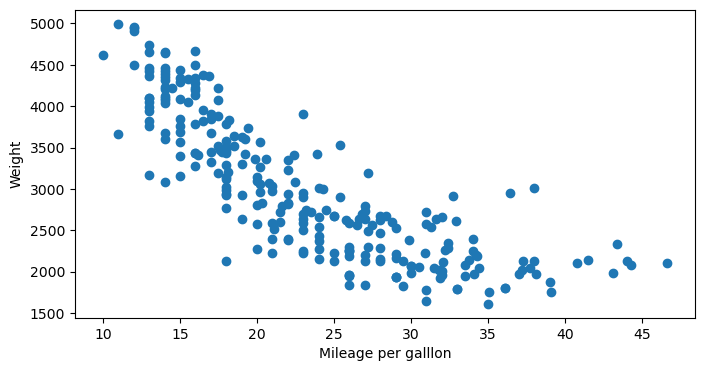

In [32]:
# To visual
plt.figure(figsize=(8,4))
plt.scatter(data['mpg'], data['weightlbs'])
plt.xlabel("Mileage per galllon")
plt.ylabel("Weight")

## 2. Model training

C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.p

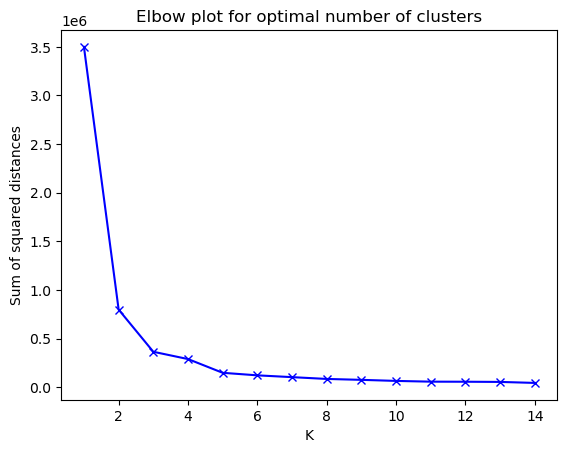

In [34]:
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k, n_init="auto")
    k_means = k_means.fit(data_x)
    
    sum_of_squared_distances.append(k_means.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel("K")
plt.ylabel("Sum of squared distances")

plt.title('Elbow plot for optimal number of clusters')
plt.show()

In [36]:
# Select where is the elbow, here approx. 3

k_means = KMeans(n_clusters=3)
k_means = k_means.fit(data_x)

C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bjauseau\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 2. Evaluate 

In [37]:
from sklearn.metrics import silhouette_score 

score = silhouette_score(data_x, k_means.labels_)
print("Score = ", score)

Score =  0.6322732212650901


In [38]:
from sklearn.metrics import homogeneity_score

hmg_score = homogeneity_score(label_y, k_means.labels_)
print('Homogeneity Score = ', hmg_score)

Homogeneity Score =  0.31550036277564175


In [39]:
from sklearn.metrics import v_measure_score

vm_score = v_measure_score(label_y, k_means.labels_)
print("V Measure Score = ", vm_score)

V Measure Score =  0.3003375614022765


In [40]:
from sklearn.metrics import completeness_score

comp_score = completeness_score(label_y, k_means.labels_)
print("Completeness Score = ", comp_score)

Completeness Score =  0.28656536273532296


In [42]:
from sklearn.metrics import adjusted_rand_score

adjusted_score = adjusted_rand_score(label_y, k_means.labels_)
print("Adjusted Score = ", adjusted_score) # Really bad here

Adjusted Score =  0.11281925794858022


In [45]:
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual = adjusted_mutual_info_score(label_y, k_means.labels_, average_method='arithmetic')
print('Adjusted mutual Score = ', adj_mutual)

Adjusted mutual Score =  0.2945981842532957


## 3. Agglomerative clustering

In [47]:
import skimage
from skimage.data import coins

coins = coins()

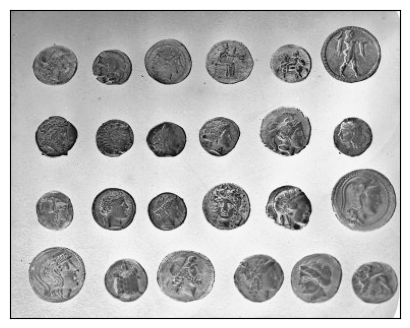

In [49]:
plt.figure(figsize=(8,4))
plt.imshow(coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

# 3. Simplify image to be faster

In [51]:
from scipy.ndimage import gaussian_filter
from skimage.transform import rescale

In [52]:
smoothened_coins = gaussian_filter(coins, sigma=2)

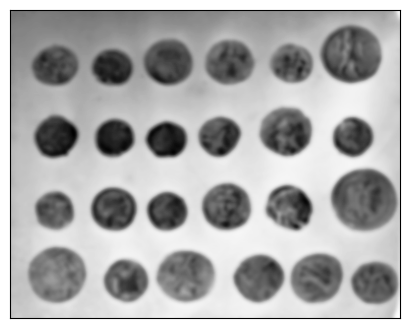

In [53]:
plt.figure(figsize=(8,4))
plt.imshow(smoothened_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [56]:
resclaed_coins = rescale(smoothened_coins, 0.2, mode="reflect",
                        anti_aliasing=True, multichannel=False)

C:\Users\bjauseau\AppData\Local\Temp\ipykernel_828\2944610220.py:1: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  resclaed_coins = rescale(smoothened_coins, 0.2, mode="reflect",


In [57]:
resclaed_coins.shape

(61, 77)

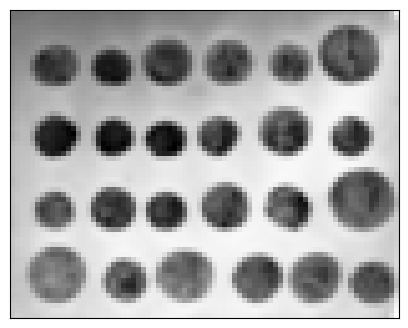

In [58]:
plt.figure(figsize=(8,4))
plt.imshow(resclaed_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

## 3. Training model

In [71]:
n_clusters = 10

In [60]:
X = np.reshape(resclaed_coins, (-1, 1))

X.shape

(4697, 1)

In [61]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

ac.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [64]:
ac.labels_ # 10 clusters here

array([6, 9, 6, ..., 5, 1, 7], dtype=int64)

## 3. Visualize

In [68]:
labels = np.reshape(ac.labels_, resclaed_coins.shape) # To be the same dimension of image

labels.shape

(61, 77)

In [69]:
# To see label
unique_labels = np.unique(labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

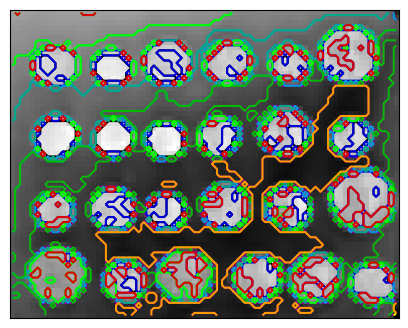

In [72]:
plt.figure(figsize=(8, 4))
plt.imshow(resclaed_coins, cmap=plt.cm.gray)

for l in unique_labels :
    plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])
    
plt.xticks(())
plt.yticks(())

plt.show()

## 3. Improve clustering

In [74]:
# To obtain graph of connecitvity in image
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*resclaed_coins.shape)

connectivity.shape

(4697, 4697)

In [75]:
n_clusters = 27 # close to the numbers of pieces

In [76]:
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)

ward.fit(X)

AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=27)

In [78]:
labels = np.reshape(ward.labels_, resclaed_coins.shape)

In [79]:
unique_labels = np.unique(labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)